In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%matplotlib inline

In [22]:
from pathlib import Path
import string

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.table as mtable
from matplotlib import rcParams

import pandas as pd

import graphs as gr
import intro_plots as ip

rcParams['figure.dpi'] = 200
deck_path = Path('../deck/figures/')

In [66]:
df = pd.read_csv("nydata", parse_dates=['DATE'])
nydf = df[df['NAME'].isin(ip.cdict.keys())].copy()

In [68]:
nydf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 235 to 41684
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   NAME       999 non-null    object        
 1   LATITUDE   999 non-null    float64       
 2   LONGITUDE  999 non-null    float64       
 3   DATE       999 non-null    datetime64[ns]
 4   PRCP       990 non-null    float64       
 5   TAVG       999 non-null    float64       
 6   TAVGF      999 non-null    float64       
 7   PRCPS      990 non-null    float64       
 8   PRCPI      990 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 78.0+ KB


In [144]:
prcp = nydf.groupby(['NAME', pd.Grouper(key='DATE', freq='M')]).sum().unstack()['PRCPI']

In [145]:
prcp

DATE,2021-01-31,2021-02-28,2021-03-31,2021-04-30
NAME,,,,
ALBANY AP,1.846453,1.779524,1.791335,1.964563
BINGHAMTON,1.885823,2.606294,1.984248,1.811020
BUFFALO,1.854327,2.066925,1.921256,1.673225
GLENS FALLS AP,1.535430,1.696847,1.188974,1.885823
ISLIP LI MACARTHUR AP,1.858264,4.216527,3.925189,2.787396
NEW YORK JFK INTL AP,2.279523,4.775581,3.082671,1.988185
NEW YORK LAGUARDIA AP,2.185035,4.125976,3.118104,1.929130
ROCHESTER GTR INTL AP,1.972437,2.232279,1.023620,2.326767
SYRACUSE HANCOCK INTL AP,2.551176,1.944878,1.362202,1.263777


In [157]:
scale= (1,3)
cols = prcp.columns.strftime("%B").tolist()
rows = [string.capwords(s).replace('Ap', 'AP') for s in  prcp.index]

In [159]:
prcp.values.astype('str').str

array([[1.846453, 1.779524, 1.791335, 1.964563],
       [1.885823, 2.606294, 1.984248, 1.81102 ],
       [1.854327, 2.066925, 1.921256, 1.673225],
       [1.53543 , 1.696847, 1.188974, 1.885823],
       [1.858264, 4.216527, 3.925189, 2.787396],
       [2.279523, 4.775581, 3.082671, 1.988185],
       [2.185035, 4.125976, 3.118104, 1.92913 ],
       [1.972437, 2.232279, 1.02362 , 2.326767],
       [2.551176, 1.944878, 1.362202, 1.263777]])

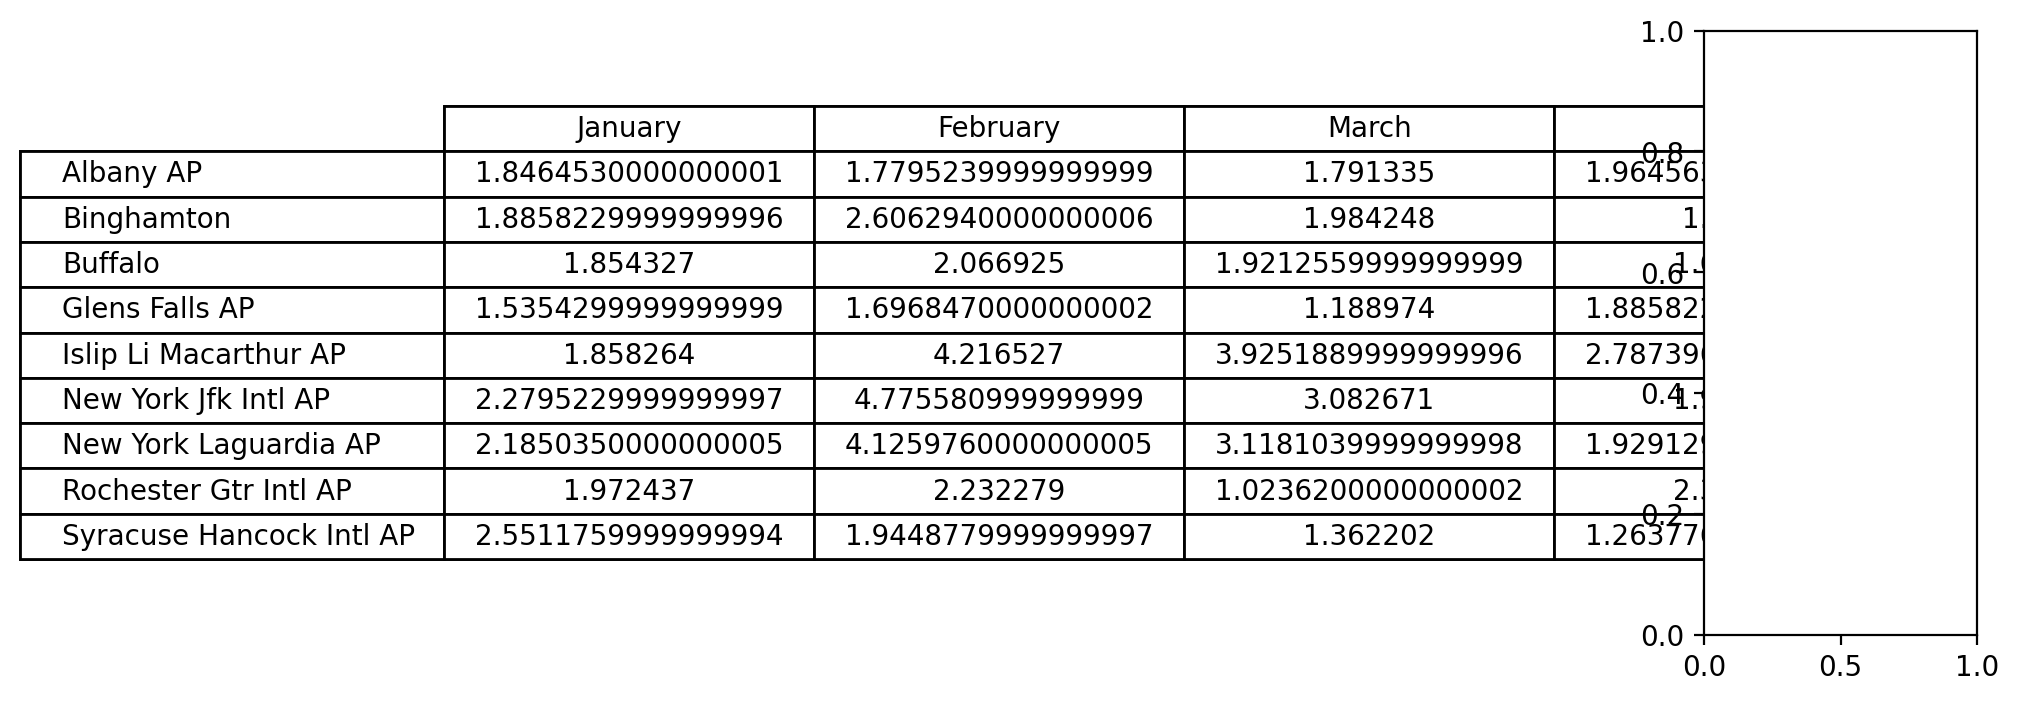

In [158]:
# table -? heatmap, color codes
fig, axd = plt.subplot_mosaic([['table','.', 'heatmap']])

tab = gr.plot_table(axd['table'], prcp.values, columns=cols, rows=rows, scale=scale)


In [ ]:
# permutation -? heatmap, color codes

In [ ]:
# rotation -? heatmap, color codes

In [ ]:
# translation -? heatmap, color codes

In [ ]:
# scaling -? heatmap, color codes